In [3]:
import mne
import os
import os.path as op
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import re
import glob


исследуем спектры
-выделяем бейзлайн и эпоху для четырех условий


In [43]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.006, baseline=None, preload = True)
evoked = epochs.average()

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 4 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1190752135.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


In [171]:
av_base.average().get_data().shape

(28, 144)

In [161]:
test = av.average().get_data() - av_base.average().get_data()

In [162]:
test.mean(axis = 0)

array([ 4.83212041e-14, -2.30888127e-14,  7.75805273e-13,  1.24003677e-12,
        9.04738011e-13, -5.44435167e-13, -6.70877715e-14,  7.70707888e-13,
        5.18762265e-13,  1.64348489e-13,  2.67276332e-13,  1.43370459e-13,
        1.25770215e-13, -1.12299037e-13, -2.05751815e-13, -1.92214651e-13,
       -1.29758309e-13, -1.86268854e-13, -1.67520001e-13, -1.92526553e-13,
       -3.16004939e-13, -2.94740274e-13, -2.61618213e-13, -3.64041885e-13,
       -4.98127573e-13, -4.19543887e-13, -4.45520138e-13, -6.05523110e-13,
       -6.81799133e-13, -7.68024638e-13, -9.31187515e-13, -9.34140863e-13,
       -1.58273278e-12, -2.10427133e-12, -1.95673322e-12, -1.81867522e-12,
       -2.28302277e-12, -2.46197808e-12, -2.59868559e-12, -3.60562618e-12,
       -6.81031070e-12, -6.17048845e-12, -5.27768776e-12, -4.84999999e-12,
       -5.12613652e-12, -3.01357474e-12, -2.91205981e-12, -2.58339935e-12,
       -1.53360028e-12, -5.87316501e-13, -4.40945617e-13, -1.96815130e-13,
       -1.27940047e-13, -

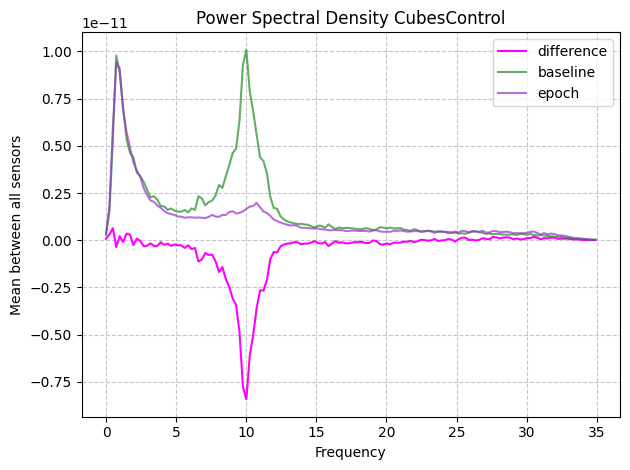

In [38]:
test = av_c.average().get_data() - av_base_c.average().get_data()
plt.plot(av_base[1].to_data_frame()['freq'], test.mean(axis = 0), linestyle='-',  color='magenta', label='difference')
plt.plot(av_base[1].to_data_frame()['freq'], av_base_c.average().get_data().mean(axis = 0), linestyle='-', color='forestgreen',alpha=0.7, label='baseline')
plt.plot(av_base[1].to_data_frame()['freq'], av_c.average().get_data().mean(axis = 0), linestyle='-', color='darkorchid',alpha=0.7, label='epoch')

plt.xlabel('Frequency')
plt.ylabel('Mean between all sensors')
plt.title(f'Power Spectral Density CubesControl')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [190]:
test = av.average().get_data() - av_base.average().get_data()
test1 = av_f.average().get_data() - av_base_f.average().get_data()
test2 = test - test1
test

array([[-8.72788292e-14, -1.23230090e-12, -2.13013167e-12, ...,
         1.35940593e-13,  7.15281311e-14,  4.35182011e-14],
       [-6.86542746e-14, -2.25491971e-13, -9.38608262e-13, ...,
         3.91134100e-15,  1.41073430e-15, -4.37312602e-15],
       [-1.24665152e-14, -1.94850848e-13, -6.20661567e-13, ...,
         9.03060028e-14,  4.63085569e-14,  3.55561362e-14],
       ...,
       [ 4.20379508e-14, -6.24116226e-13, -5.63711601e-13, ...,
        -1.62375372e-14, -6.72176160e-14, -8.55381736e-14],
       [-2.59935158e-14, -4.37774614e-13, -1.28209159e-12, ...,
        -1.94439285e-14, -2.11387698e-14, -2.58865446e-14],
       [ 8.70431909e-14, -1.46243648e-12, -2.08028516e-12, ...,
         5.22195954e-14, -1.55348125e-14, -2.80035059e-14]])

In [44]:
test2

AttributeError: 'numpy.ndarray' object has no attribute 'to_data_frame'

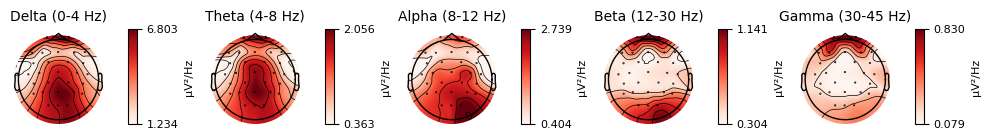

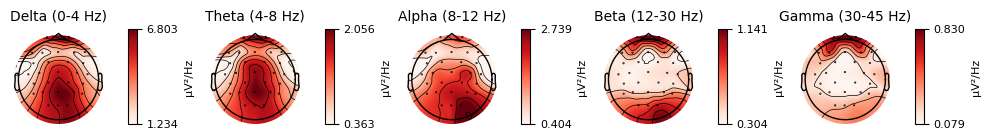

In [56]:
av_h.plot_topomap()

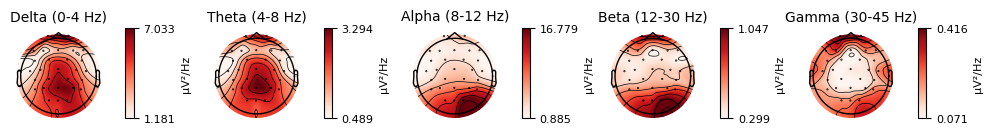

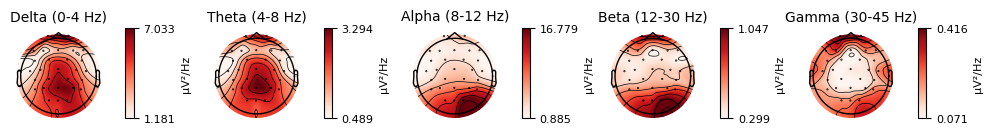

In [57]:
av_base_h.plot_topomap()

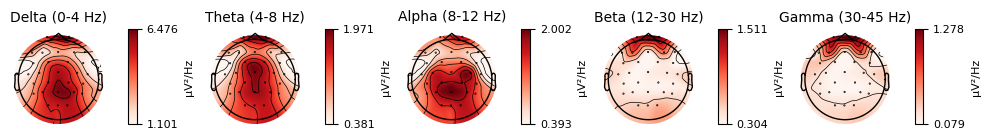

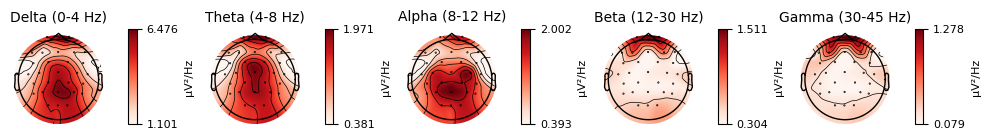

In [50]:
av.plot_topomap()

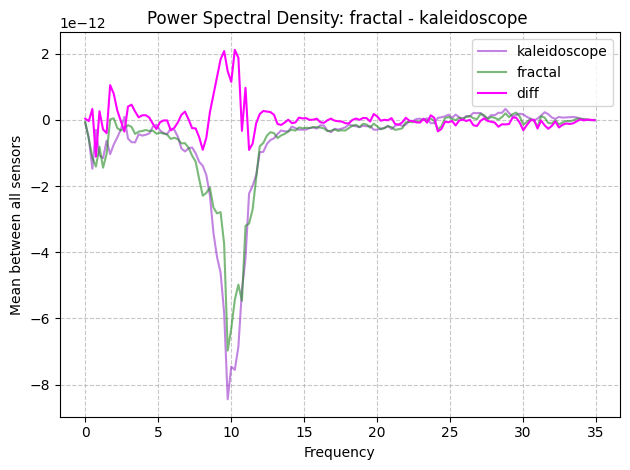

In [31]:
test = av.average().get_data() - av_base.average().get_data()
test1 = av_f.average().get_data() - av_base_f.average().get_data()
test2 = test1 - test

plt.plot(av_base[1].to_data_frame()['freq'], test.mean(axis = 0), linestyle='-', color='darkorchid',alpha=0.6, label='kaleidoscope')
plt.plot(av_base[1].to_data_frame()['freq'], test1.mean(axis = 0), linestyle='-', color='forestgreen',alpha=0.6, label='fractal')
plt.plot(av_base[1].to_data_frame()['freq'], test2.mean(axis = 0), linestyle='-',   color='magenta',alpha=1, label='diff')

plt.xlabel('Frequency')
plt.ylabel('Mean between all sensors')
plt.title(f'Power Spectral Density: fractal - kaleidoscope ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

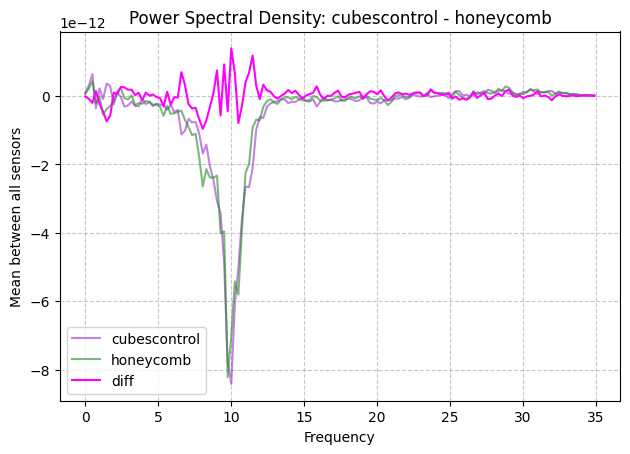

In [39]:
test = av_c.average().get_data() - av_base_c.average().get_data()
test1 = av_h.average().get_data() - av_base_h.average().get_data()
test2 = test1 - test 

plt.plot(av_base[1].to_data_frame()['freq'], test.mean(axis = 0), linestyle='-', color='darkorchid',alpha=0.6,  label='cubescontrol')
plt.plot(av_base[1].to_data_frame()['freq'], test1.mean(axis = 0), linestyle='-', color='forestgreen',alpha=0.6, label='honeycomb')
plt.plot(av_base[1].to_data_frame()['freq'], test2.mean(axis = 0), linestyle='-',   color='magenta',alpha=1, label='diff')

plt.xlabel('Frequency')
plt.ylabel('Mean between all sensors')
plt.title(f'Power Spectral Density: cubescontrol - honeycomb')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [179]:
plt.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/psd/{scene}')

In [ ]:
av.average().get_data()

In [146]:
fig = av.plot(average = True)
plt.gca().set_title(f'{scene}')
fig.savefig('D:/hse/psychodelic_like_experience/data_processing/pics/psd/{scene}')

Averaging across epochs...


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\_mpl_figure.py:2373: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [78]:
av_base_f

,condition,epoch,freq,Fp1,Fz,F3,F7,FC5,FC1,C3,...,CP2,Cz,C4,T8,FC6,FC2,F4,F8,Fp2,subject
0,kaleidoscope/Blue,6,0.000000,2.470775e-13,1.005770e-15,2.748605e-14,1.485614e-13,2.717335e-14,8.489492e-14,1.443655e-14,...,3.442253e-14,6.737250e-15,2.339048e-13,4.354193e-14,1.308318e-13,1.456213e-13,6.913252e-14,6.773807e-16,5.271590e-13,AS32
1,kaleidoscope/Blue,6,0.244141,4.089428e-12,1.688040e-12,1.056866e-12,9.322755e-13,6.382342e-13,3.227786e-12,2.773441e-12,...,1.995273e-12,2.401904e-12,1.805190e-12,1.023972e-12,1.032854e-12,2.245738e-12,8.030858e-13,7.746791e-14,1.756959e-12,AS32
2,kaleidoscope/Blue,6,0.488281,1.716553e-12,1.724479e-12,5.009173e-13,1.821966e-12,3.772231e-13,2.830396e-12,2.790755e-12,...,1.377003e-14,6.459822e-13,4.901050e-14,2.291468e-13,4.516430e-14,8.435442e-13,7.570813e-13,1.691275e-13,7.813040e-14,AS32
3,kaleidoscope/Blue,6,0.732422,2.807262e-12,1.445767e-12,1.038190e-13,2.318668e-12,1.876850e-13,8.878657e-13,6.307562e-13,...,4.172005e-12,3.852830e-12,2.636138e-12,6.424952e-13,2.271832e-13,3.667482e-12,1.099696e-12,8.701060e-13,1.621462e-13,AS32
4,kaleidoscope/Blue,6,0.976562,1.178015e-11,2.245298e-12,2.306589e-12,3.467630e-13,2.125378e-12,2.965696e-12,3.926403e-12,...,2.759174e-12,6.231889e-13,2.885194e-12,1.854834e-12,3.691952e-13,1.919878e-12,1.393837e-12,9.385022e-13,7.181198e-13,AS32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,kaleidoscope/Yellow,2,33.935547,2.176807e-13,6.557382e-14,1.350139e-13,9.970736e-14,1.688763e-14,4.692390e-14,4.255313e-14,...,8.476357e-14,1.932379e-13,7.680917e-14,7.083042e-15,8.825103e-14,1.924091e-13,1.499773e-13,9.996550e-15,2.175392e-13,YT50
140,kaleidoscope/Yellow,2,34.179688,7.575943e-14,1.579498e-14,4.527401e-14,1.576512e-14,3.906927e-14,1.872045e-14,9.022129e-14,...,3.516381e-14,4.992505e-14,3.153979e-14,1.835740e-15,1.255538e-14,4.401757e-14,4.116205e-14,5.023137e-14,7.437087e-14,YT50
141,kaleidoscope/Yellow,2,34.423828,9.580368e-14,2.482587e-14,5.633787e-14,1.638917e-15,4.332932e-14,2.369956e-14,5.305504e-14,...,3.476880e-14,5.333423e-14,3.520889e-14,1.819016e-15,1.155028e-14,4.796489e-14,1.793047e-14,2.875915e-14,8.622023e-14,YT50
142,kaleidoscope/Yellow,2,34.667969,4.334672e-14,2.419715e-14,5.223648e-14,1.747846e-14,3.421052e-14,1.073688e-14,1.489917e-14,...,2.559267e-14,3.288657e-14,3.607554e-14,1.157038e-15,6.536560e-17,5.494065e-14,6.305664e-14,4.704881e-14,7.904074e-14,YT50


In [79]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/psd_df"
#scenes = ['CubesControl', 'Fractal', 'HoneyComb', 'kaleidoscope']
scenes = ['CubesControl']

for scene in scenes:
    files = glob.glob(f"{folder_path}/*{scene}*")
    list_epochs = []
    for file in files:
        epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
        epoch = epoch.crop(tmin = -5, tmax = 60)
        epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
        list_epochs.append(epoch)
    info = epoch.info
    for epoch in list_epochs:
        epoch.info = info
    epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
    av = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
    av_base = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
    #av.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/{scene}.csv')
    #av_base.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/{scene}_base.csv')
    


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ..

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
R

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors


C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors


C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magni

Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.20

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No b

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
    

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an S

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an S

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...

C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found


C:\Users\User\AppData\Local\Temp\ipykernel_15772\4175096496.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


KeyboardInterrupt: 

In [81]:
av_base_f

,condition,epoch,freq,Fp1,Fz,F3,F7,FC5,FC1,C3,...,CP2,Cz,C4,T8,FC6,FC2,F4,F8,Fp2,subject
0,kaleidoscope/Blue,6,0.000000,2.470775e-13,1.005770e-15,2.748605e-14,1.485614e-13,2.717335e-14,8.489492e-14,1.443655e-14,...,3.442253e-14,6.737250e-15,2.339048e-13,4.354193e-14,1.308318e-13,1.456213e-13,6.913252e-14,6.773807e-16,5.271590e-13,AS32
1,kaleidoscope/Blue,6,0.244141,4.089428e-12,1.688040e-12,1.056866e-12,9.322755e-13,6.382342e-13,3.227786e-12,2.773441e-12,...,1.995273e-12,2.401904e-12,1.805190e-12,1.023972e-12,1.032854e-12,2.245738e-12,8.030858e-13,7.746791e-14,1.756959e-12,AS32
2,kaleidoscope/Blue,6,0.488281,1.716553e-12,1.724479e-12,5.009173e-13,1.821966e-12,3.772231e-13,2.830396e-12,2.790755e-12,...,1.377003e-14,6.459822e-13,4.901050e-14,2.291468e-13,4.516430e-14,8.435442e-13,7.570813e-13,1.691275e-13,7.813040e-14,AS32
3,kaleidoscope/Blue,6,0.732422,2.807262e-12,1.445767e-12,1.038190e-13,2.318668e-12,1.876850e-13,8.878657e-13,6.307562e-13,...,4.172005e-12,3.852830e-12,2.636138e-12,6.424952e-13,2.271832e-13,3.667482e-12,1.099696e-12,8.701060e-13,1.621462e-13,AS32
4,kaleidoscope/Blue,6,0.976562,1.178015e-11,2.245298e-12,2.306589e-12,3.467630e-13,2.125378e-12,2.965696e-12,3.926403e-12,...,2.759174e-12,6.231889e-13,2.885194e-12,1.854834e-12,3.691952e-13,1.919878e-12,1.393837e-12,9.385022e-13,7.181198e-13,AS32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,kaleidoscope/Red,9,33.935547,1.844488e-13,2.464298e-14,5.365777e-14,2.411295e-13,1.905454e-14,2.504899e-14,5.898978e-15,...,1.485993e-14,2.809072e-15,4.337486e-14,6.775012e-14,7.257613e-15,2.314792e-14,6.113135e-14,9.972040e-14,7.607978e-13,FK24
140,kaleidoscope/Red,9,34.179688,1.742738e-13,1.977384e-14,1.736881e-13,2.924515e-13,7.500093e-14,2.496095e-14,6.532824e-15,...,1.941237e-14,3.637499e-15,1.261630e-13,6.278214e-13,5.293727e-14,5.920809e-14,2.641971e-13,1.834836e-13,1.207420e-12,FK24
141,kaleidoscope/Red,9,34.423828,1.477151e-12,5.769139e-14,1.385443e-12,1.162030e-12,4.719070e-13,5.766471e-14,1.029107e-13,...,1.698108e-14,4.167128e-14,7.322084e-14,7.207671e-13,5.720902e-14,1.695659e-14,1.554462e-13,2.835011e-13,8.607328e-14,FK24
142,kaleidoscope/Red,9,34.667969,2.044734e-12,1.056078e-13,9.365721e-13,6.242922e-13,2.204366e-13,5.995922e-14,8.019325e-14,...,1.722213e-14,4.382172e-14,4.825139e-14,6.406944e-13,1.847085e-14,6.436495e-14,4.558319e-13,1.340468e-13,4.814059e-13,FK24


In [68]:
{file[58:62]}

{'YT50'}

In [85]:
    epochs =  mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/FK24_epo.fif", preload=True)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active


AttributeError: 'NoneType' object has no attribute 'shape'

In [83]:
epochs

Number of events,9
Events,CubesControl/BlueRed: 0CubesControl/GreenOrange: 1CubesControl/PinkBlue: 1CubesControl/PinkYellow: 0CubesControl/PurpleGreen: 1Fractal/Blue: 1Fractal/Green: 1Fractal/Purple: 1Fractal/Red: 1Fractal/Yellow: 1HoneyComb/BluePink: 0HoneyComb/GreenOrange: 0HoneyComb/GreenPurple: 0HoneyComb/OrangePink: 0HoneyComb/RedBlue: 0kaleidoscope/Blue: 0kaleidoscope/Green: 0kaleidoscope/Purple: 1kaleidoscope/Red: 0kaleidoscope/Yellow: 0
Time range,-5.000 – 60.000 s
Baseline,off


In [86]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin"
files = glob.glob(f"{folder_path}/*epo*")
files

['D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\AS32_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\CB55_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\DE21_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\DF23_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\EE89_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\FK11_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\fx48_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\GF87_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\GG88_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\GS21_epo.fif',
 'D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin\\HG11_epo.fif',
 'D:/hse/psychodelic_like_experi

In [93]:
files[1][70:74]

'CB55'

In [99]:
av_base_f

,condition,epoch,freq,Fp1,Fz,F3,F7,FC5,FC1,C3,...,CP2,Cz,C4,T8,FC6,FC2,F4,F8,Fp2,subject
0,kaleidoscope/Yellow,12,0.000000,1.856253e-13,2.149597e-16,8.803482e-15,2.800530e-15,6.198214e-14,3.579418e-13,5.132595e-14,...,1.377959e-13,4.660503e-14,1.213226e-13,2.170284e-13,1.345491e-14,7.427755e-14,4.280728e-14,2.842367e-13,7.297789e-13,AS32
1,kaleidoscope/Yellow,12,0.244141,1.475582e-12,4.559551e-14,3.887440e-14,1.703905e-12,2.615380e-13,9.481862e-13,9.487342e-14,...,4.442649e-13,2.380743e-13,3.557939e-13,1.225189e-12,9.506792e-14,4.503013e-13,5.830106e-14,9.686027e-13,4.456557e-13,AS32
2,kaleidoscope/Yellow,12,0.488281,1.482941e-12,2.386268e-13,2.612099e-14,5.167936e-12,1.140575e-12,9.274933e-13,2.843089e-13,...,9.049665e-13,6.169658e-13,9.244966e-13,1.947620e-12,1.992742e-13,8.830456e-13,1.934474e-13,8.369847e-13,3.080142e-12,AS32
3,kaleidoscope/Yellow,12,0.732422,2.269287e-12,8.247376e-13,1.241657e-12,1.858789e-12,2.979020e-12,5.636310e-12,5.583337e-13,...,4.011191e-12,2.998908e-12,5.260986e-12,1.651105e-12,2.068433e-12,3.264860e-12,2.739269e-12,2.428256e-12,2.250667e-12,AS32
4,kaleidoscope/Yellow,12,0.976562,3.406331e-12,8.973887e-13,1.858879e-12,1.106536e-12,1.004124e-12,1.795060e-11,2.264766e-14,...,4.221300e-12,7.527805e-12,7.525825e-12,1.167431e-12,5.084678e-12,8.015402e-12,5.581740e-12,3.444707e-12,8.312010e-13,AS32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,kaleidoscope/Yellow,12,33.935547,8.572570e-14,7.868710e-14,4.654201e-13,1.040208e-13,3.140930e-13,7.635789e-14,5.396703e-14,...,7.870917e-15,1.717029e-14,1.392510e-13,5.063431e-13,2.213912e-13,5.875761e-15,1.841467e-13,5.767828e-14,7.834866e-14,TY65
140,kaleidoscope/Yellow,12,34.179688,1.658030e-13,6.299725e-15,2.740185e-14,6.222635e-14,4.105202e-14,2.494845e-14,8.015307e-15,...,1.760402e-14,2.558857e-15,6.492999e-13,6.793324e-13,7.214541e-13,9.878425e-14,3.995979e-13,1.645685e-13,1.643400e-13,TY65
141,kaleidoscope/Yellow,12,34.423828,4.081005e-13,5.638719e-15,3.374343e-14,5.292638e-14,9.293824e-14,5.735530e-14,5.801315e-15,...,8.583185e-15,2.533442e-15,2.309231e-13,8.610529e-14,4.650742e-13,5.244797e-14,1.046107e-13,2.478072e-13,1.518466e-13,TY65
142,kaleidoscope/Yellow,12,34.667969,4.017392e-13,4.499285e-15,1.155110e-13,3.946900e-13,2.040809e-13,1.766535e-14,2.795850e-14,...,3.235597e-15,5.540582e-15,1.134372e-13,1.910642e-13,2.734643e-13,1.152479e-14,2.640994e-14,1.743005e-13,5.370806e-14,TY65


In [104]:
epoch

Number of events,1
Events,Fractal/Green: 1
Time range,-5.000 – 60.000 s
Baseline,off


In [105]:
av_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/table.csv')
av_base_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/table_base.csv')


In [107]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/fin"
files = glob.glob(f"{folder_path}/*epo*")
av_f = pd.DataFrame()
av_base_f = pd.DataFrame()
for file in files:
    epochs =  mne.read_epochs(f"{file}", preload=True)
    for i in range(0, len(epochs)):
            epoch = epochs[i].crop(tmin = -5, tmax = 60)
            epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
            ep = epoch.copy().crop(tmin = 0, tmax = 60).compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
            ep['subject'] = f'{file[70:74]}'
            av_f = pd.concat([av_f,ep], axis=0 )  
            ep_base = epoch.copy().crop(tmin = -5, tmax = 0).compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
            ep_base['subject'] = f'{file[70:74]}'
            av_base_f = pd.concat([av_base_f,ep_base], axis=0 )  
av_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/table.csv')
av_base_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/table_base.csv')


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\AS32_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
5 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs =  mne.read_epochs(f"{file}", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels we

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs =  mne.read_epochs(f"{file}", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels we

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\fx48_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automati

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs =  mne.read_epochs(f"{file}", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels we

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\KI09_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Inter

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\KO33_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
In

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\NO21_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
7 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interp

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epochs =  mne.read_epochs(f"{file}", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:6: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels we

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_expe

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\RT12_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interp

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fin\TY65_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3616811831.py:9: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   60000.00 ms
        0 CTF compensation matrices available
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
In

In [80]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/psd_df"
#scenes = ['CubesControl', 'Fractal', 'HoneyComb', 'kaleidoscope']
scenes = ['kaleidoscope']
av_f = pd.DataFrame()
av_base_f = pd.DataFrame()

for scene in scenes:
    files = glob.glob(f"{folder_path}/*{scene}*")
    #list_epochs = []
    for file in files:
        epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
        epoch = epoch.crop(tmin = -5, tmax = 60)
        epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
        #list_epochs.append(epoch)
        ep = epoch.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
        ep['subject'] = f'{file[58:62]}'
        av_f = pd.concat([av_f,ep], axis=0 )  
        ep_base = epoch.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
        ep_base['subject'] = f'{file[58:62]}'
        av_base_f = pd.concat([av_base_f,ep_base], axis=0 )  

#av_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/{scene}_subj.csv')
#av_base_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/{scene}_base_subj.csv')


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) acti

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Red_epo.f

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_kaleidoscope_Yellow_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original mag

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 ma

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original mag

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Red_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoc

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_kaleidoscope_Yellow_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original mag

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matric

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original mag

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoc

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodel

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original mag

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoc

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_proc

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:13: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:13: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 C

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:13: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:13: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_kaleidoscope_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices availabl

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:13: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good durin

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_proc

C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original mag

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:12: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoc

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_kaleidoscope_Yellow_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original mag

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\1665393492.py:11: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original mag

KeyboardInterrupt: 

In [62]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/psd_df"
#scenes = ['CubesControl', 'Fractal', 'HoneyComb', 'kaleidoscope']
scenes = ['Fractal']

for scene in scenes:
    files = glob.glob(f"{folder_path}/*{scene}*")
    list_epochs = []
    for file in files:
        epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
        epoch = epoch.crop(tmin = -5, tmax = 60)
        epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
        list_epochs.append(epoch)
    info = epoch.info
    for epoch in list_epochs:
        epoch.info = info
    epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
    av_f = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
    #av_f['subject'] = {file[58:62]}
    av_base_f = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
    #av_base_f['subject'] = {file[58:62]}
    av_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/{scene}.csv')
    av_base_f.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/{scene}_base.csv')
    


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) ac

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Green_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline c

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace d

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) acti

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) acti

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\h

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensati

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) ac

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        E

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of r

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processi

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hs

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operato

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -500

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline corr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline cor

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        E

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of r

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_ex

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline c

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline c

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline corr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) act

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operato

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline c

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection i

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of int

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
   

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channel

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\clea

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\clea

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3868468667.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

Not setting metadata
128 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


In [63]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/psd_df"
#scenes = ['CubesControl', 'Fractal', 'HoneyComb', 'kaleidoscope']
scenes = ['CubesControl']

for scene in scenes:
    files = glob.glob(f"{folder_path}/*{scene}*")
    list_epochs = []
    for file in files:
        epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
        epoch = epoch.crop(tmin = -5, tmax = 60)
        epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
        list_epochs.append(epoch)
    info = epoch.info
    for epoch in list_epochs:
        epoch.info = info
    epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
    av_c = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
    av_base_c = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
    av_c.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/{scene}.csv')
    av_base_c.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/{scene}_base.csv')


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PinkBlue_epo.fif ...


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-P

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No bas

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\dat

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an S

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpol

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
R

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-P

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychod

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_CubesControl_PurpleGreen_epo.fif ...
    Read a 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
R

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automat

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Read

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_BlueRed_epo.fif ...
    Read a tot

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: h

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Re

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No bas

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No base

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No bas

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_pr

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No bas

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No base

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No base

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP0

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP o

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting met

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correc

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_BlueRed_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpol

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PinkBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-P

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PinkYellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_CubesControl_PurpleGreen_epo.fif ...
    Read a total of 2 projection items:
  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3483298349.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

Not setting metadata
115 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


In [65]:
folder_path = "D:/hse/psychodelic_like_experience/data_processing/psd_df"
#scenes = ['CubesControl', 'Fractal', 'HoneyComb', 'kaleidoscope']
scenes = ['HoneyComb']

for scene in scenes:
    files = glob.glob(f"{folder_path}/*{scene}*")
    list_epochs = []
    for file in files:
        epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
        epoch = epoch.crop(tmin = -5, tmax = 60)
        epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
        list_epochs.append(epoch)
    info = epoch.info
    for epoch in list_epochs:
        epoch.info = info
    epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
    av_h = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
    av_base_h = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
    av_h.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd/{scene}.csv')
    av_base_h.to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_base/{scene}_base.csv')


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
     

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baselin

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels w

Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        E

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Ho

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodeli

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_Gree

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction appl

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original m

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
      

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{f

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseli

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels w

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseli

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
     

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baselin

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   2

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baselin

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_proce

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP ope

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_HoneyComb_GreenOra

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_H

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP oper

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels w

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 m

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_GreenOrange_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
 

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseli

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functio

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Ho

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:9: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_HoneyComb_OrangePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...  

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_BluePink_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 project

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_BluePink

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  e

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_GreenPurple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No bas

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Honey

C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_HoneyComb_RedBlue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:11: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_15772\3159218838.py:16: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dr

Not setting metadata
116 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


In [40]:
list_epochs_base = []
for file in files:
    epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
    epoch = epoch.crop(tmin = -5, tmax = 0)
    epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
    #epoch = epoch.compute_psd()
    list_epochs_base.append(epoch)
    #epoch.compute_psd().to_data_frame().to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_df_base/{file[:-8]}.csv')

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Yel

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline c

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magni

Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.2

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation,

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magni

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Gr

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)


Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operato

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) acti

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Comput

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activa

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magni

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=Tru

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\c

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operato

C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\2190802407.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


In [114]:
list_epochs = []
for file in files:
    epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
    epoch = epoch.crop(tmin = -5, tmax = 60)
    epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
    #epoch = epoch.compute_psd()
    list_epochs.append(epoch)
    #epoch.compute_psd().to_data_frame().to_csv(f'D:/hse/psychodelic_like_experience/data_processing/psd_df_base/{file[:-8]}.csv')

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\AS32_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\CB55_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) a

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magni

No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DE21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 63.87% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\DF23_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operato

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 79.10% of its original magni

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\EE89_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK11_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during S

2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{fi

2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\FK24_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{fi

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\fx48_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magnitude by subselecting 25/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 73.99% of its original magni

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 3 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline cor

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{fi

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GF87_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 84.85% of its original magnitude by subselecting 27/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_P

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GG88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_ex

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\GS21_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\HG11_Fractal_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_ex

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JK67_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Green_epo.fif ...
    Read a total o

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\JU77_Fractal_Yellow_epo.fif .

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KI09_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KL72_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\c

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensor

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\KO33_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) acti

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\LL90_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processi

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MN99_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) act

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\MO45_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        E

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of r

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\NO21_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) a

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OO11_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline corr

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline co

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{fi

Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 23 sensor positions
Interpolating 5 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\OP01_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-01' has been reduced to 52.48% of its original magnitude by subselecting 23/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 83.83% of its original magni

    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline co

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PO67_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline corr

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fi

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channe

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\PP00_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels wer

2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Purple_epo.fif ...
    Read a total of 2 projectio

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{fi

1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RD56_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:3: RuntimeWarning: Projection vector 'EOG-eeg--0.200-0.200-PCA-02' has been reduced to 69.76% of its original magnitude by subselecting 26/28 of the original channels. If the ignored channels were bad during SSP computation, we recommend recomputing proj (via compute_proj_raw or related functions) with the bad channels properly marked, because computing SSP with bad channels present in the data but unmarked is dangerous (it can bias the PCA used by SSP). On the other hand, if you know that all channels were good during SSP computation, you can safely use info.normalize_proj() to suppress this warning during projection.
  epoch = mne.read_epochs(f"D:/hse/psychodelic_like_experience/data_processing/cleaned_epochs/{file[58:-4]}_epo.fif", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RO88_Fractal_Yellow_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching e

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\RT12_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channel

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection it

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TR90_Fractal_Yellow_epo.fif .

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\TY65_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_exp

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)


1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 94.6 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 1 sensors
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Blue_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Green_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) 

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Purple_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading D:\hse\psychodelic_like_experience\data_processing\cleaned_epochs\YT50_Fractal_Red_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
No

C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch 

        EOG-eeg--0.200-0.200-PCA-01 (1 x 28) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 28) active
    Found the data of interest:
        t =   -5000.00 ...   20000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:4: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (20 s)
  epoch = epoch.crop(tmin = -5, tmax = 60)
C:\Users\User\AppData\Local\Temp\ipykernel_14116\1347630127.py:5: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch = epoch.interpolate_bads(reset_bads=True, mode='accurate')


In [115]:
info = epoch.info
for epoch in list_epochs_base:
    epoch.info = info
epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
av = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
av_base = epochs_base.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
av.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal.csv')
av_base.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal_base.csv')
info = epoch.info
for epoch in list_epochs:
    epoch.info = info

In [116]:
epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')
#epochs_base = mne.concatenate_epochs(list_epochs_base, on_mismatch='ignore')


C:\Users\User\AppData\Local\Temp\ipykernel_14116\1804954693.py:1: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(list_epochs, on_mismatch='ignore')


Not setting metadata
128 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)


    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


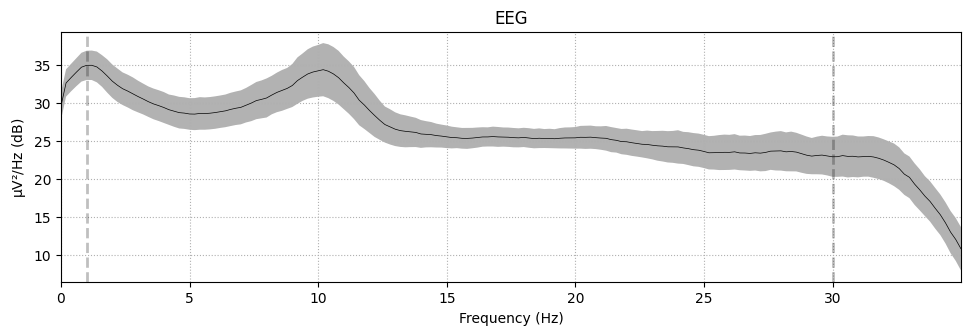

In [54]:
epochs.compute_psd(fmin=0, fmax=35, tmin = -5, tmax = 0).average().plot(average = True)


    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


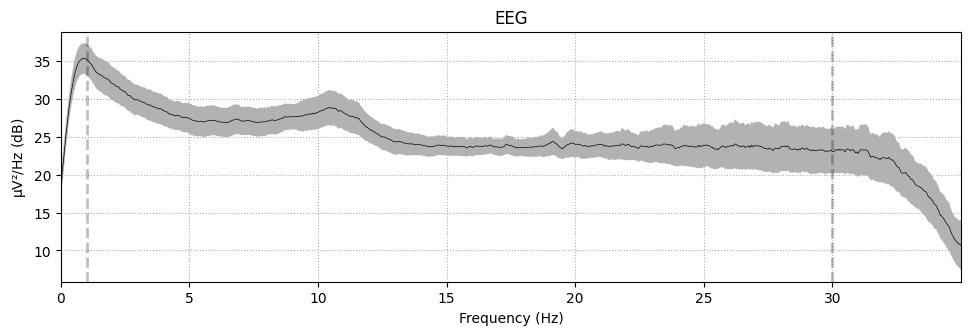

In [55]:
epochs.compute_psd(fmin=0, fmax=35, tmin = 0, tmax = 60).average().plot(average = True)


In [117]:
av = epochs.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = 0, tmax = 60).to_data_frame()
av_base = epochs_base.compute_psd(method = 'welch', fmin=0, fmax=35, tmin = -5, tmax = 0).to_data_frame()
av.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal.csv')
av_base.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal_base.csv')

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


In [124]:
av.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal.csv')
av_base.to_csv('D:/hse/psychodelic_like_experience/data_processing/fractal_base.csv')

In [121]:
av.descent(av_base)

AttributeError: 'DataFrame' object has no attribute 'descent'

In [90]:
data = av.get_data() - av_base.get_data()
data

array([[-6.29284807e-14, -1.31232131e-12, -2.16378709e-12, ...,
         1.77676723e-13,  6.00844305e-14,  5.51507988e-14],
       [-1.15536919e-13, -3.98063621e-13, -1.44786377e-12, ...,
         8.35648890e-15,  2.61759070e-15, -2.34839892e-15],
       [-3.14127922e-14, -3.23134256e-13, -1.01285805e-12, ...,
         1.12767760e-13,  3.94012777e-14,  4.10032050e-14],
       ...,
       [-7.33187320e-15, -9.21775088e-13, -1.41726152e-12, ...,
        -2.59863570e-15, -6.45425616e-14, -9.73092452e-14],
       [-4.20465233e-14, -5.30004105e-13, -1.49941791e-12, ...,
        -1.54985735e-14, -1.81185648e-14, -3.00864478e-14],
       [ 9.81262518e-14, -1.86652831e-12, -4.06805128e-12, ...,
         1.04846683e-13, -1.41459649e-14, -4.56446235e-14]])

In [95]:
av.data = data

In [93]:
av.get_data()

array([[3.69327319e-13, 1.86432935e-12, 5.69759561e-12, ...,
        2.24555125e-13, 1.32678958e-13, 9.95090609e-14],
       [1.45055394e-13, 8.99062135e-13, 2.78828436e-12, ...,
        2.92715564e-14, 1.81917810e-14, 1.48904954e-14],
       [8.57104885e-14, 4.64819019e-13, 1.42762949e-12, ...,
        1.65108295e-13, 9.60427344e-14, 7.77418770e-14],
       ...,
       [1.95962280e-13, 1.11102482e-12, 2.77960894e-12, ...,
        9.15789629e-14, 6.55919402e-14, 4.85993328e-14],
       [1.53281476e-13, 8.55218979e-13, 2.76161576e-12, ...,
        4.78778676e-14, 3.47378011e-14, 2.39068981e-14],
       [4.63175205e-13, 2.18185751e-12, 7.05315743e-12, ...,
        2.14591200e-13, 1.41740710e-13, 9.89279333e-14]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


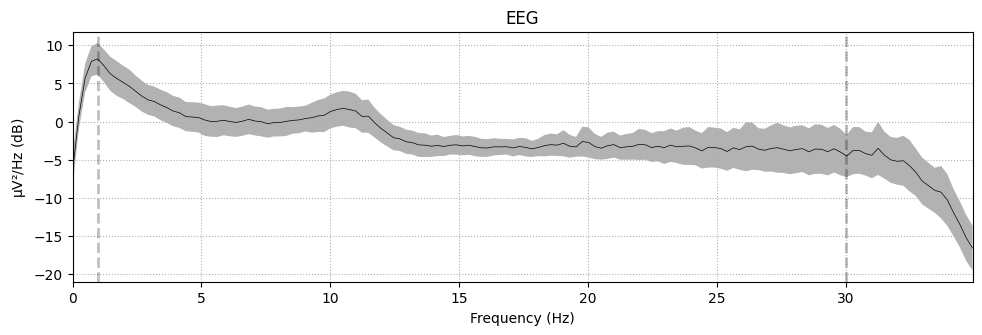

In [84]:
av.plot(average = True)